<a href="https://colab.research.google.com/github/germfsip/2132ReconocimientoPatrones/blob/main/Clase5RP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reconocimiento de Patrones
##Dr. Gerardo Martinez
##Lección 5 - Clasificación (Parte 2)

## Clasificadores no lineales

Primeramente importemos unos paquetes


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

Vamos a crear 3 datasets de prueba con el siguiente código

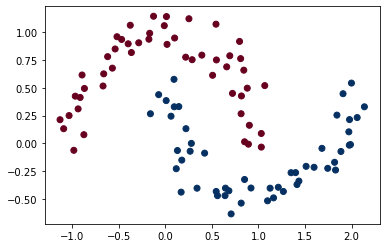

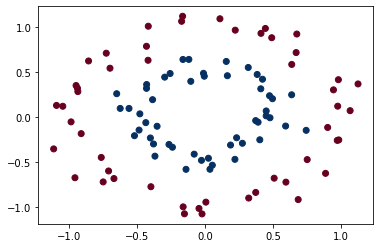

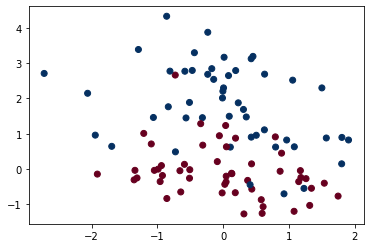

In [16]:
x, y = make_classification(n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1)
rng = np.random.RandomState(2)
x += 2 * rng.uniform(size=x.shape)

datasets = [make_moons(noise=0.1), 
            make_circles(noise=0.1, factor=0.5),
            (x, y)]

# Dibujar datasets
for i in range(3):
  plt.figure()
  plt.scatter(datasets[i][0][:,0], datasets[i][0][:,1],
           c=datasets[i][1], cmap=plt.cm.RdBu)



Para poder dibujar lo que hace cada uno de nuestros modelos les dejo est[a función, no es necesaria entendela

In [17]:
#@title
def test_model(model, datasets):
  figure = plt.figure(figsize=(9, 3))
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  h = .02
  i = 1
  
  # iterate over datasets
  for ds_cnt, ds in enumerate(datasets):

    x, y = ds
    x = StandardScaler().fit_transform(x)
    xtrain, xtest, ytrain, ytest = train_test_split(x, y)
    x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
    y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))
    ax = plt.subplot(1, 3, i)
    model.fit(xtrain, ytrain)
    score_train = model.score(xtrain, ytrain)
    score_test = model.score(xtest, ytest)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(model, "decision_function"):
      zz = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
      zz = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    # Put the result into a color plot
    zz = zz.reshape(xx.shape)
    ax.contourf(xx, yy, zz, cmap=cm, alpha=.8)
    # Plot the training points
    ax.scatter(xtrain[:, 0], xtrain[:, 1], c=ytrain, cmap=cm_bright,
    edgecolors='k')
      # Plot the testing points
    ax.scatter(xtest[:, 0], xtest[:, 1], c=ytest, cmap=cm_bright,
    edgecolors='k', alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.text(xx.max() - .3, yy.min() + .7, '%.2f' % score_train,
    size=15, horizontalalignment='right')
    ax.text(xx.max() - .3, yy.min() + .3, '%.2f' % score_test,
    size=15, horizontalalignment='right')
    i += 1
  plt.tight_layout()
  plt.show()

En la siguiente linea de código vamos a experimentar con los diferentes modelos no lineales de clasificación

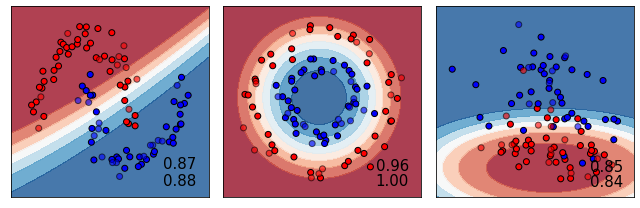

In [18]:
#model = KNeighborsClassifier(3)
#model = SVC(gamma=2, C=1)
#model = GaussianProcessClassifier(1.0 * RBF(1.0))
#model = DecisionTreeClassifier(max_depth=5)
#model = MLPClassifier(hidden_layer_sizes=(100,20), alpha=0.1, max_iter=500)
model = GaussianNB()

test_model(model, datasets)

### Clasificación multiclase

Primeramente vamos a cargar los datos

In [19]:
import requests
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
r = requests.get(url, allow_redirects=True)
filename = "raw.csv"
open(filename, 'wb').write(r.content)


dataset = pd.read_csv('raw.csv', header=None,
    names=['sepal_length','sepal_width','petal_length','petal_width','species'])
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Vamos a explorar los datos

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


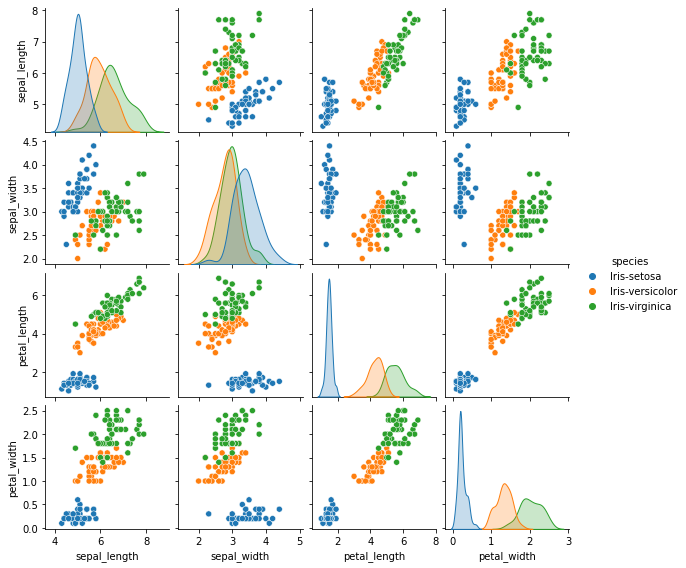

In [20]:
import seaborn
seaborn.pairplot(dataset, hue="species", size=2, diag_kind="kde")
plt.show()

Entrenemos nuestro sistema

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train:  0.9821428571428571
Test:  0.9473684210526315
Clasification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.95        38
      macro avg       0.95      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38



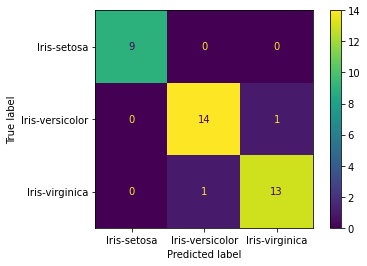

In [21]:
x = np.asanyarray(dataset.drop(columns=['species']))
y = np.asanyarray(dataset[['species']])


from sklearn.linear_model import LogisticRegression

xtrain, xtest, ytrain, ytest = train_test_split(x,y)

model = LogisticRegression(multi_class='multinomial')

model.fit(xtrain, ytrain)
print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

from sklearn.metrics import plot_confusion_matrix, classification_report
print('Clasification Report: \n',
      classification_report(ytest, model.predict(xtest)))

plot_confusion_matrix(model, xtest, ytest)